# Convergence tests - dynamics and moments

In this file we show how to test for convergence of the system dynamics and the work moments. 

In both cases, we must test for convergence w.r.t. the timestep dt and the SVD precision p.

For the moments, it is also necessary to check for convergence w.r.t. 
(i) 's' the equilibration time
(ii) The finite difference order

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_dynamics(a, tp, sta, dt, p):
    filename  = f'dynamics-files/dyns-a{a}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv'
    try:
        df = pd.read_csv(filename)
        return df
    except:
        return None

### CONVERGENCE PLOTS FOR DYNAMICS

def plot_dynamics_convergence(alpha, tp, dt_list, p_list, sta_list=[0,1]):
    # dictionary to store dataframes with (dt,p) as key
    dfs = {}

    colors = ['blue', 'red']
    linestyles = ['-', '--', '-.', ':']

    for dt in dt_list:
        for p in p_list:
            for sta in sta_list:
                dfs[(dt, p, sta)] = pd.read_csv(f'dynamics-files/dyns-a{alpha}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv')
         
    # Create figure with three subplots
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    # choose integers for slicing (n=0, m=-1 for the whole range)
    n = 0
    m = -1
    
    # NO STA
    # Plot coherence
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[0,sta].plot(dfs[(dt,p, sta)]['tlist'][n:m], dfs[(dt,p, sta)]['coh'][n:m],
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])

    ax[0,0].set_ylabel('Coherence')
    ax[0,0].legend(ncol=2, fontsize=6)    
    ax[0,1].set_ylabel('Coherence')
    ax[0,1].legend(ncol=2, fontsize=6)

    # Plot overlap_target
    for i, dt in enumerate(dt_list):
        for j, p in enumerate(p_list):
            for sta in sta_list:
                ax[1, sta].plot(dfs[(dt,p, sta)]['tlist'][n:m], dfs[(dt,p, sta)]['overlap_target'][n:m],
                        label=f'dt={dt}, p={p}',
                        color=colors[i],
                        linestyle=linestyles[j])
    ax[1,0].set_xlabel('Time')
    ax[1,0].set_ylabel('Overlap Target')
    ax[1,0].legend(ncol=2, fontsize=6)
    
    ax[1,1].set_xlabel('Time')
    ax[1,1].set_ylabel('Overlap Target')
    ax[1,1].legend(ncol=2, fontsize=6)


    ax[0,0].set_ylim(-0.1, 1.1)
    ax[1,0].set_ylim(-0.1, 1.1)
    ax[0,1].set_ylim(-0.1, 1.1)
    ax[1,1].set_ylim(-0.1, 1.1)

    ax[0,0].set_title('No STA')
    ax[0,1].set_title('With STA')
    
    ax[1,0].axhline(1, color='black', linestyle='--', linewidth=0.5)
    ax[1,1].axhline(1, color='black', linestyle='--', linewidth=0.5)
    plt.suptitle(f'Convergence tests for dynamics: alpha={alpha}, tp={tp}', fontsize=16)
    plt.tight_layout()
    plt.show()
    return

# Test run of convergence of system dynamics

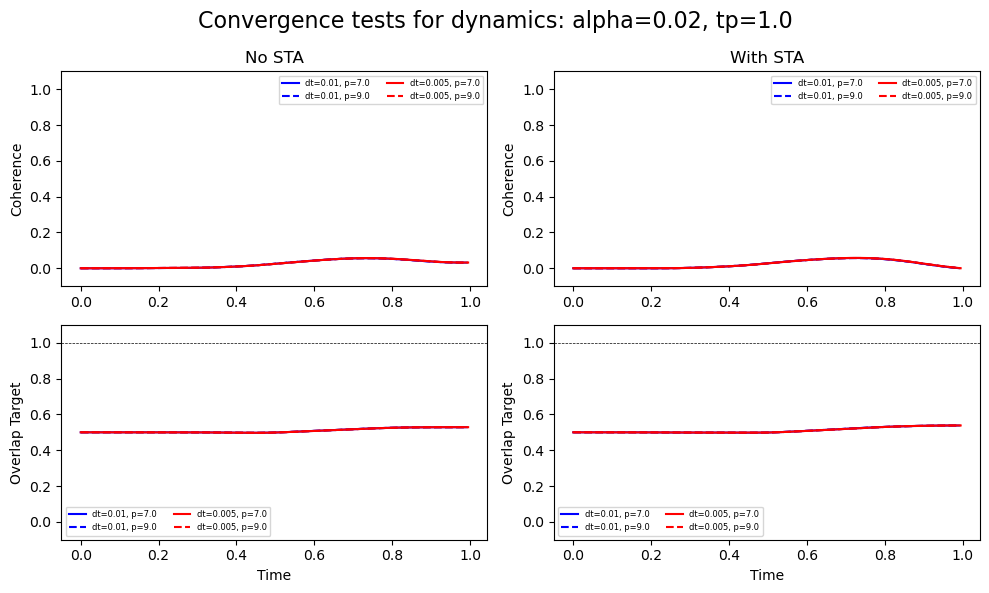

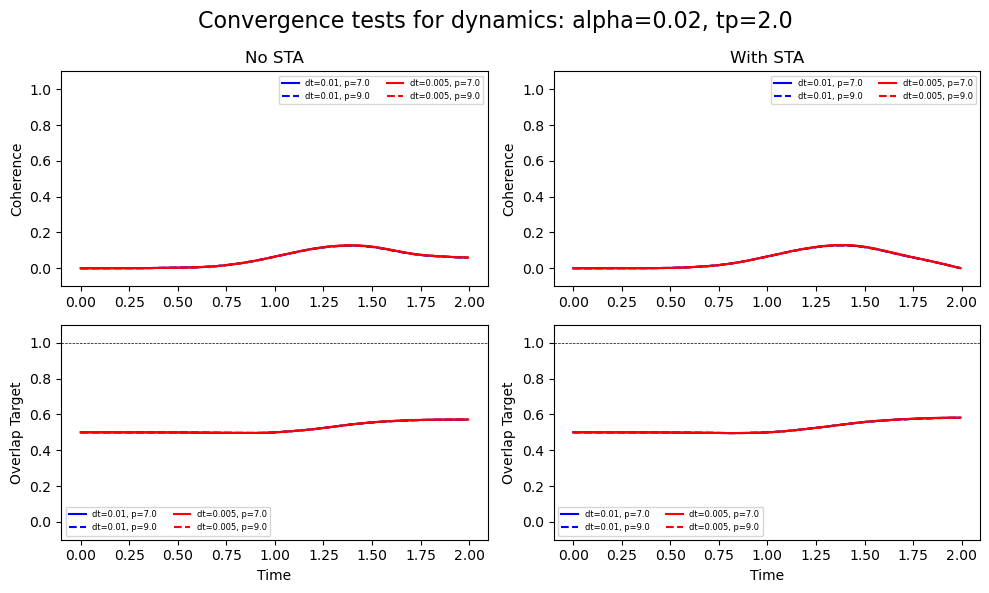

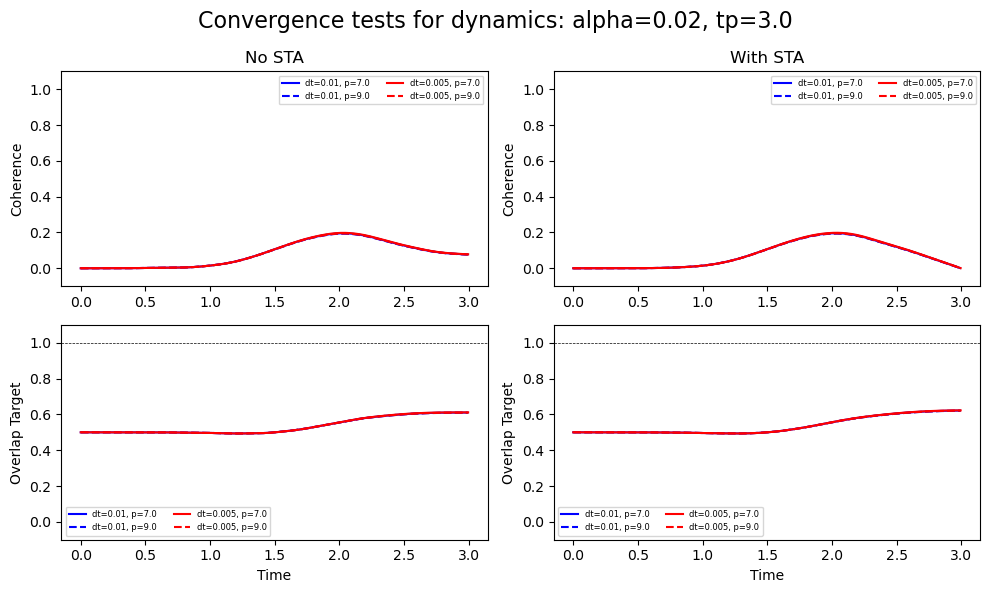

In [11]:
alpha=0.02
tp_list = [1.0, 2.0, 3.0]
dt_list = [0.01, 0.005]
p_list = [7.0, 9.0]
for tp in tp_list:
    plot_dynamics_convergence(alpha, tp, dt_list, p_list)


In [12]:
# TODO: add in convergence of moments

In [13]:
# TODO add in convergence of WCF